In [2]:
import requests
import json
import bs4
import pandas as pd

def get_id(num):
    data=pd.read_csv(r'C:\Users\Pritam\Downloads\links.csv')
    start=0
    end=start+num
    movies=list(data['imdbId'])
    movies=movies[start:end+1]
    return movies

def scrape_id(movie_id):
    url=r'https://www.imdb.com/title/tt{}/'.format(str(movie_id).zfill(7))
    res=requests.get(url)
    data=bs4.BeautifulSoup(res.text)
    current_page=data.find('script', attrs={'type':'application/ld+json'})
    current_page=str(current_page)[str(current_page).find('{'):-9]
    return current_page

def collect_movie_data(movie_id):
    movie_data=scrape_id(movie_id)
    movie_data=json.loads(movie_data)
    movie={'name':movie_data['name'],'movie_genre':movie_data['genre'],'movie_rating':movie_data['aggregateRating']['ratingValue']}
    return movie

ids=get_id(5)
for i in ids:
    print(collect_movie_data(i))


{'name': 'Toy Story', 'movie_genre': ['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy'], 'movie_rating': '8.3'}
{'name': 'Jumanji', 'movie_genre': ['Adventure', 'Comedy', 'Family', 'Fantasy'], 'movie_rating': '7.0'}
{'name': 'Grumpier Old Men', 'movie_genre': ['Comedy', 'Romance'], 'movie_rating': '6.7'}
{'name': 'Waiting to Exhale', 'movie_genre': ['Comedy', 'Drama', 'Romance'], 'movie_rating': '5.9'}
{'name': 'Father of the Bride Part II', 'movie_genre': ['Comedy', 'Family', 'Romance'], 'movie_rating': '6.0'}
{'name': 'Heat', 'movie_genre': ['Crime', 'Drama', 'Thriller'], 'movie_rating': '8.2'}


In [3]:
ids=get_id(5)
ls=[]
rating=[]
for i in ids:
    x=collect_movie_data(i)
    ls.append(x['name'])
    rating.append(float(x['movie_rating']))
ls
rating

[8.3, 7.0, 6.7, 5.9, 6.0, 8.2]

In [4]:
ls

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat']

In [5]:
rating

[8.3, 7.0, 6.7, 5.9, 6.0, 8.2]

<BarContainer object of 6 artists>

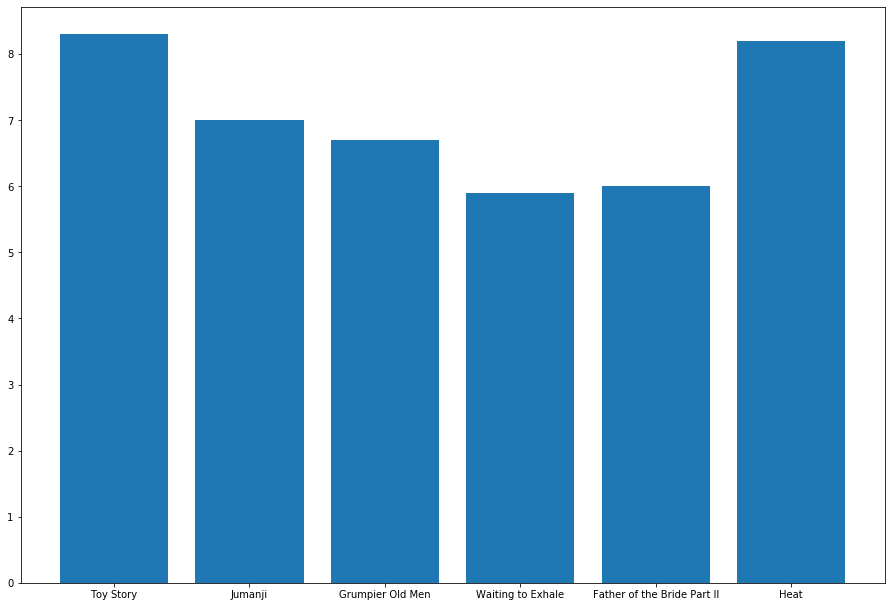

In [6]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.bar(ls,rating)